# PyTorch Demo

## Overview

This demo shows how to use a pretrained PyTorch model to predict the class<br>
to which an image belongs.

Reference:<br>
- J. Papa, *PyTorch Pocket Reference*, Chapter 1

## Libraries

In [1]:
import urllib.request
import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

In [2]:
from IPython.core.interactiveshell import InteractiveShell

In [3]:
InteractiveShell.ast_node_interactivity = "all"

In [4]:
proj_path_string = r"C:/Nayef/ml-notes"  # os.path.dirname(__file__) doesn't work in Python Console or Jupyter # noqa
proj_path = Path(proj_path_string)

## Image to classify

In [5]:
url = "https://pytorch.tips/coffee"
fpath = proj_path.joinpath("data/coffee.jpg").as_posix()

In [6]:
re_download_image = False
if re_download_image:
    urllib.request.urlretrieve(url, fpath)

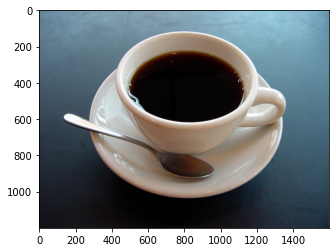

In [7]:
img = Image.open(fpath)
plt.imshow(img)
plt.show()

In [8]:
print(f"Image dimensions (width x height): {img.width} x {img.height}")

Image dimensions (width x height): 1600 x 1200


## Image transformation pipeline

In [9]:
out_width_and_height = 224

In [10]:
transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.CenterCrop(out_width_and_height),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[
                0.229,
                0.224,
                0.225,
            ],  # precomputed based on the data used to train the model  # noqa
        ),
    ]
)

In [11]:
img_tensor = transform(img)

In [12]:
img_tensor.dim()  # Rank 3 tensor
img_tensor.shape  # 3 color channels, 224 * 224 pixels
img_tensor.size()  # 3 color channels, 224 * 224 pixels

3

torch.Size([3, 224, 224])

torch.Size([3, 224, 224])

Showing tensor subsetting operations:

In [13]:
img_tensor[0, 0, 0]
img_tensor[:, 0, 0].shape
img_tensor[0, :, 0].shape
img_tensor[0, 0, :].shape

tensor(-0.1143)

torch.Size([3])

torch.Size([224])

torch.Size([224])

Showing the three colour channels:

c:\Nayef\ml-notes\.venv\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


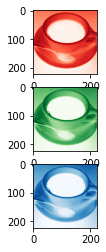

In [14]:
fig = plt.figure()
plot_rows = 3
plot_cols = 1
for channel_num, cmap in enumerate(["Reds", "Greens", "Blues"]):
    ax = plt.subplot(plot_rows, plot_cols, channel_num + 1)
    plt.imshow(img_tensor[channel_num, :, :], cmap=cmap)
fig.show()

## Batching

Efficient ML processes data in batches, and our model will expect a<br>
batch of data. Here we create a batch of size 1.

In [15]:
batch = img_tensor.unsqueeze(0)  # unsqueeze() adds a dimension to the tensor  # noqa
batch.dim()  # Rank 4 tensor
batch.shape

4

torch.Size([1, 3, 224, 224])

## Model

In [16]:
model = models.alexnet(pretrained=True)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


Set the model in evaluation mode. This has an effect only on<br>
certain components of the model.

In [18]:
model.eval()
model.to(device)
y = model(batch.to(device))
print(y.shape)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

torch.Size([1, 1000])


First dimension has size 1 because there's only one image.<br>
Second dimension has size 1000 because there are 1000 classes.

Finding most-likely class:

In [19]:
y_max, index = torch.max(y, 1)
print(index, y_max)

tensor([967]) tensor([22.8618], grad_fn=<MaxBackward0>)


What does class with index 967 represent? Let's find out.

In [20]:
url = "https://pytorch.tips/imagenet-labels"
fpath = proj_path.joinpath("data/imagenet_class_labels.txt").as_posix()

In [21]:
re_download_file = False
if re_download_file:
    urllib.request.urlretrieve(url, fpath)

In [22]:
with open(fpath) as f:
    classes = [line.strip() for line in f.readlines()]

In [23]:
print(classes[index.item()])

967: 'espresso',
